In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
df = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.drop_duplicates(inplace = True)
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.describe().T

count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

In [7]:
df.describe(include = ['O']).T

count unique           top  freq
Date    18249    169    2015-12-27   108
type    18249      2  conventional  9126
region  18249     54        Albany   338

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [9]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [10]:
city_to_state = {
    'Albany': 'New York',
    'Sacramento': 'California',
    'Northeast': 'New York',
    'NorthernNewEngland': 'New Hampshire',
    'Orlando': 'Florida',
    'Philadelphia': 'Pennsylvania',
    'PhoenixTucson': 'Arizona',
    'Pittsburgh': 'Pennsylvania',
    'Plains': 'Unknown',
    'Portland': 'Oregon',
    'RaleighGreensboro': 'North Carolina',
    'RichmondNorfolk': 'Virginia',
    'Roanoke': 'Virginia',
    'SanDiego': 'California',
    'Atlanta': 'Georgia',
    'SanFrancisco': 'California',
    'Seattle': 'Washington',
    'SouthCarolina': 'South Carolina',
    'SouthCentral': 'Unknown',
    'Southeast': 'Unknown',
    'Spokane': 'Washington',
    'StLouis': 'Missouri',
    'Syracuse': 'New York',
    'Tampa': 'Florida',
    'TotalUS': 'Unknown',
    'West': 'Unknown',
    'NewYork': 'New York',
    'NewOrleansMobile': 'Louisiana',
    'Nashville': 'Tennessee',
    'Midsouth': 'Unknown',
    'BaltimoreWashington': 'Maryland',
    'Boise': 'Idaho',
    'Boston': 'Massachusetts',
    'BuffaloRochester': 'New York',
    'California': 'California',
    'Charlotte': 'North Carolina',
    'Chicago': 'Illinois',
    'CincinnatiDayton': 'Ohio',
    'Columbus': 'Ohio',
    'DallasFtWorth': 'Texas',
    'Denver': 'Colorado',
    'Detroit': 'Michigan',
    'GrandRapids': 'Michigan',
    'GreatLakes': 'Unknown',
    'HarrisburgScranton': 'Pennsylvania',
    'HartfordSpringfield': 'Connecticut',
    'Houston': 'Texas',
    'Indianapolis': 'Indiana',
    'Jacksonville': 'Florida',
    'LasVegas': 'Nevada',
    'LosAngeles': 'California',
    'Louisville': 'Kentucky',
    'MiamiFtLauderdale': 'Florida',
    'WestTexNewMexico': 'Texas',
}


In [11]:
df['State'] = df['region'].map(city_to_state)

In [12]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Month     State  
0  2015  Albany     12  New York  
1  2015  Albany     12  New York  
2  2015  Albany     12  New York  
3  2015  Albany     12  New York  
4  2015  Albany     11  New York

In [13]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
State           0
dtype: int64

In [14]:
# #  !pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling MPG Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

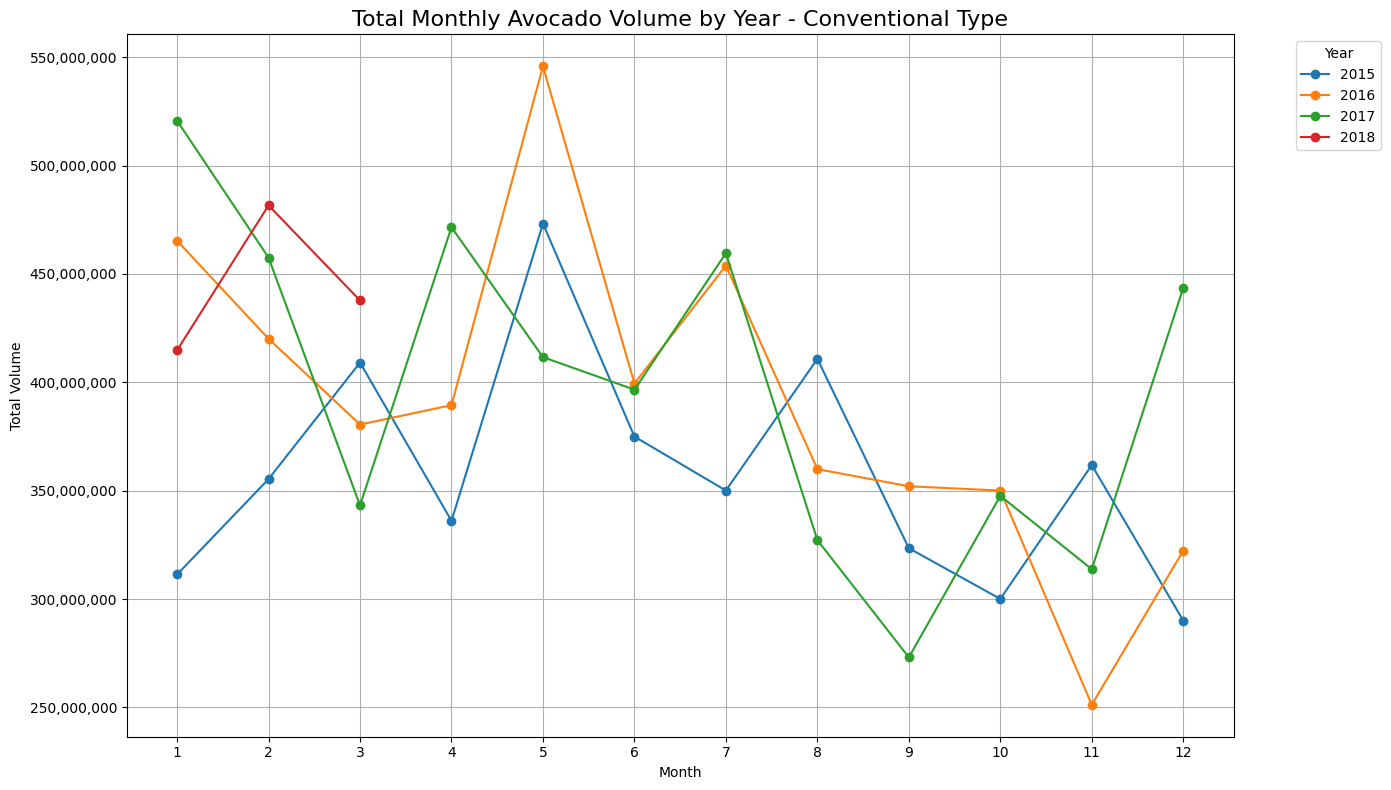

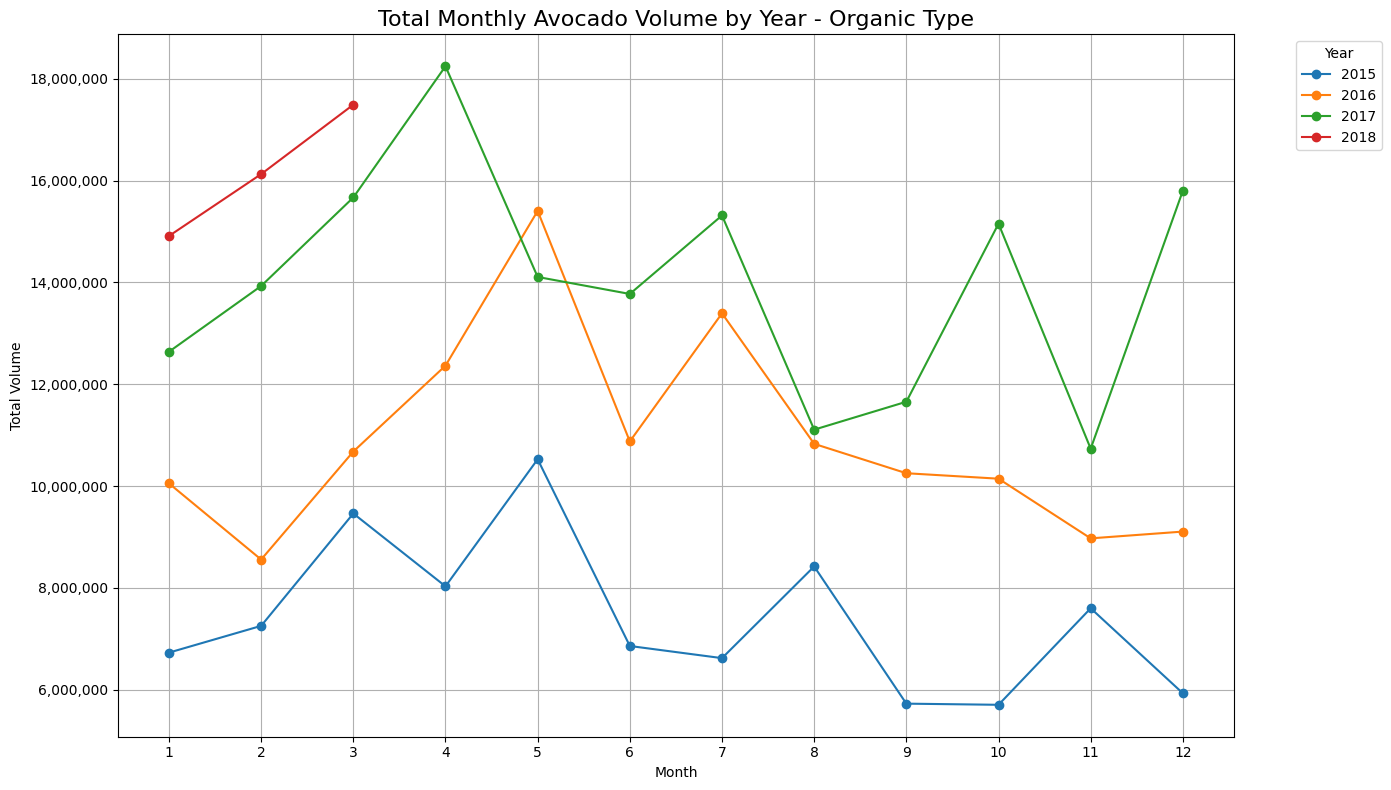

Separate charts for each avocado type have been generated.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

years = sorted(df['Date'].dt.year.unique())
types = df['type'].unique()

for avocado_type in types:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    type_data = df[df['type'] == avocado_type]
    
    for year in years:
        year_data = type_data[type_data['Date'].dt.year == year]
        monthly_data = year_data.groupby('Month')['Total Volume'].sum().reset_index()
        ax.plot(monthly_data['Month'], monthly_data['Total Volume'], marker='o', label=f'{year}')
    
    ax.set_title(f'Total Monthly Avocado Volume by Year - {avocado_type.capitalize()} Type', fontsize=16)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Volume')
    ax.grid(True)
    ax.set_xticks(range(1, 13))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

print("Separate charts for each avocado type have been generated.")

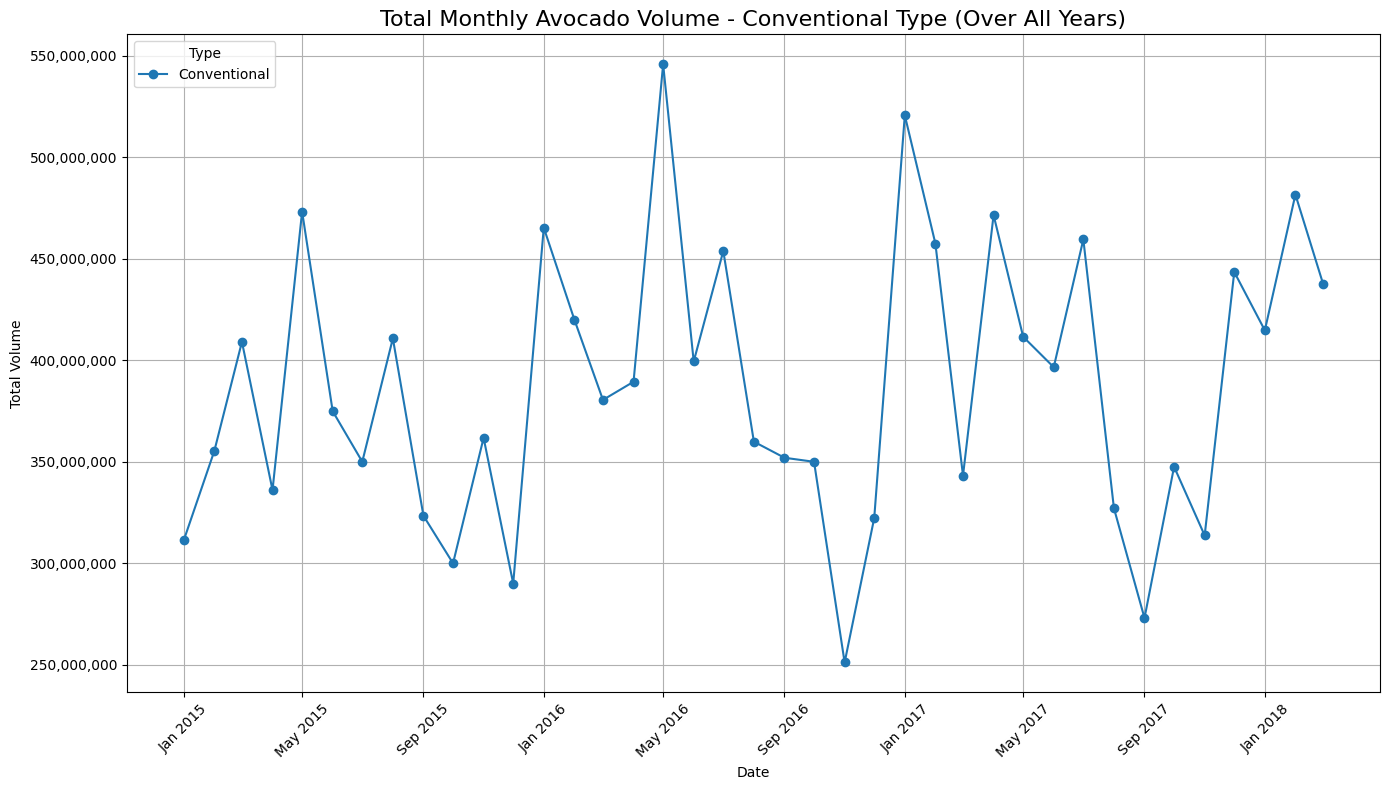

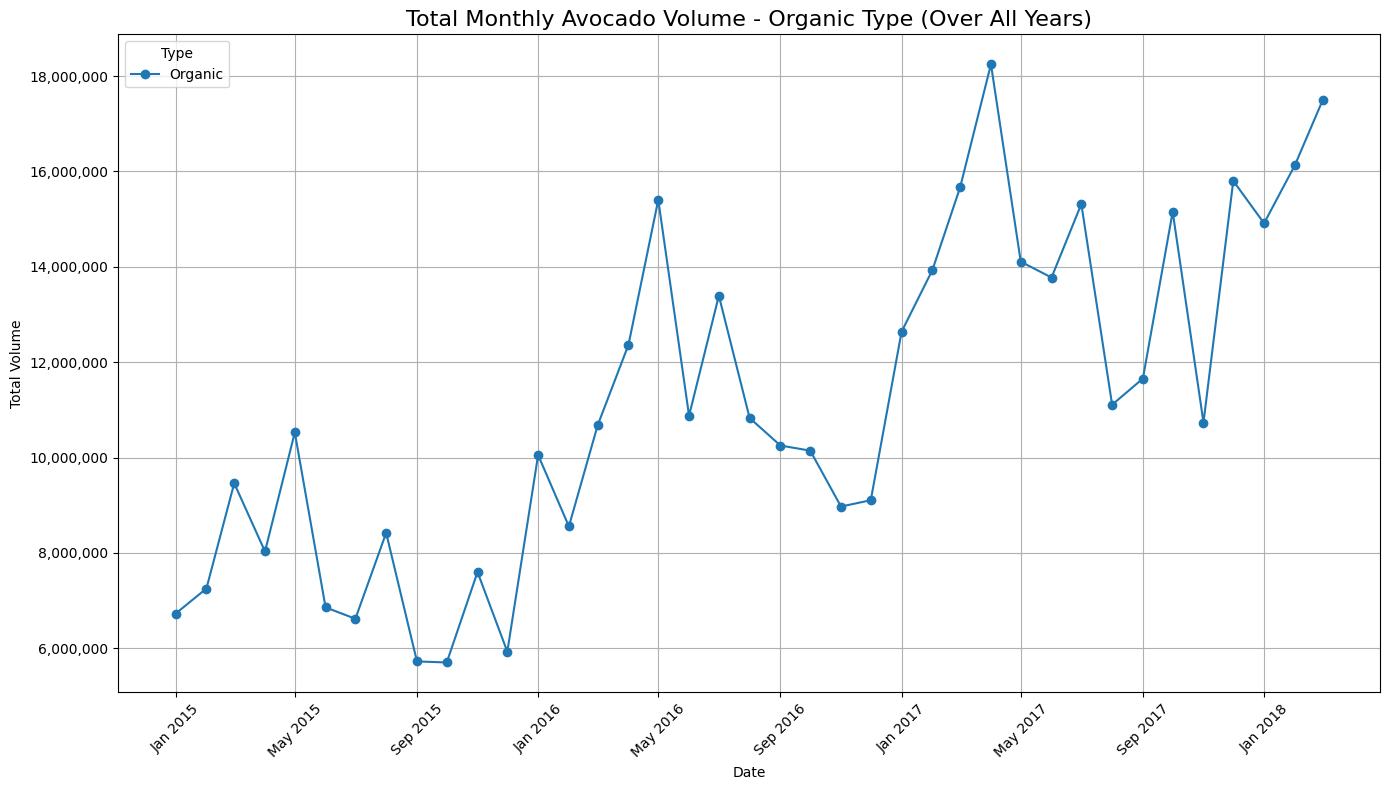

Time series charts with month and year on the x-axis for each avocado type have been generated.


In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

types = df['type'].unique()

for avocado_type in types:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    type_data = df[df['type'] == avocado_type]
    
    monthly_data = type_data.groupby(type_data['Date'].dt.to_period("M"))['Total Volume'].sum().reset_index()
    monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
    
    ax.plot(monthly_data['Date'], monthly_data['Total Volume'], marker='o', label=avocado_type.capitalize())
    
    ax.set_title(f'Total Monthly Avocado Volume - {avocado_type.capitalize()} Type (Over All Years)', fontsize=16)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Volume')
    ax.grid(True)
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Corrected import and usage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.xticks(rotation=45)
    
    ax.legend(title="Type", loc='upper left')
    

    plt.tight_layout()
    plt.show()

print("Time series charts with month and year on the x-axis for each avocado type have been generated.")

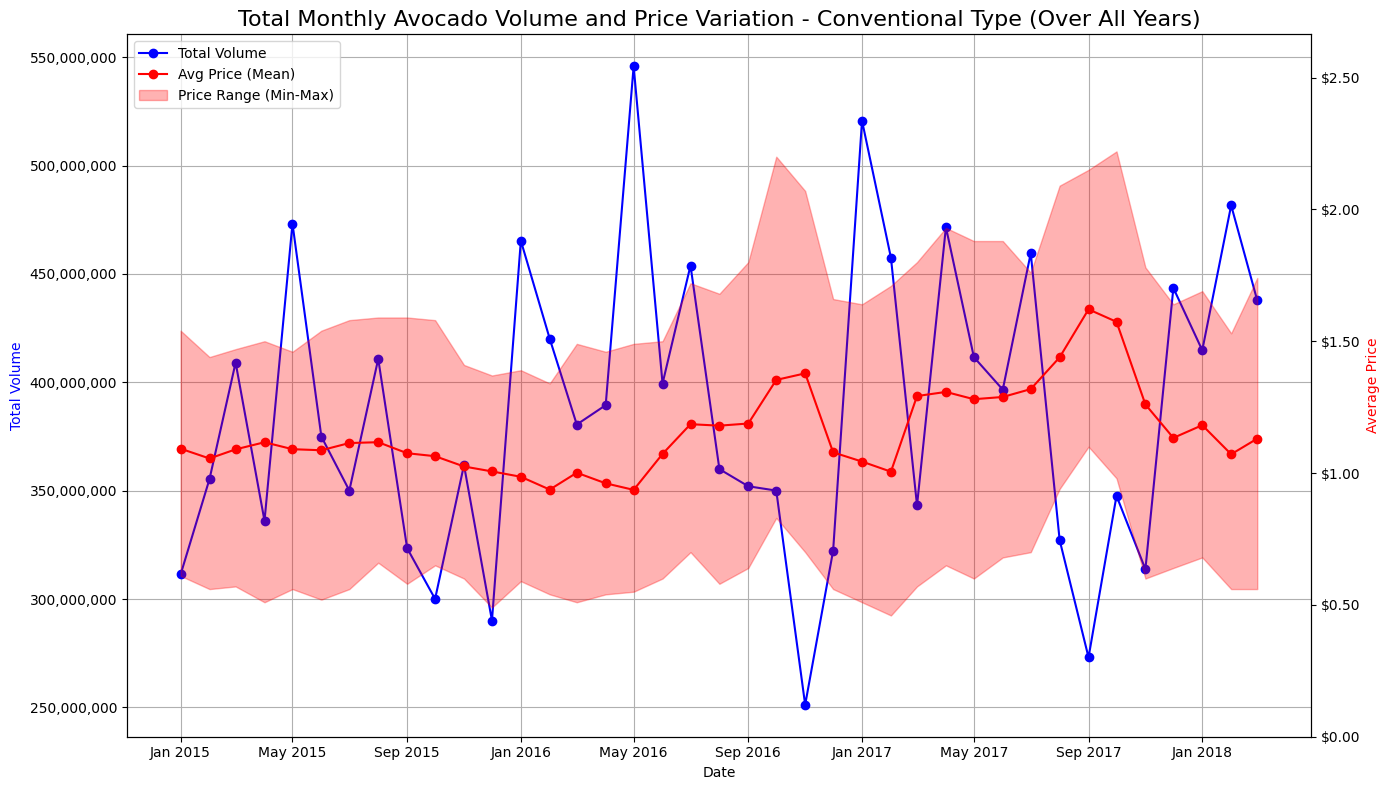

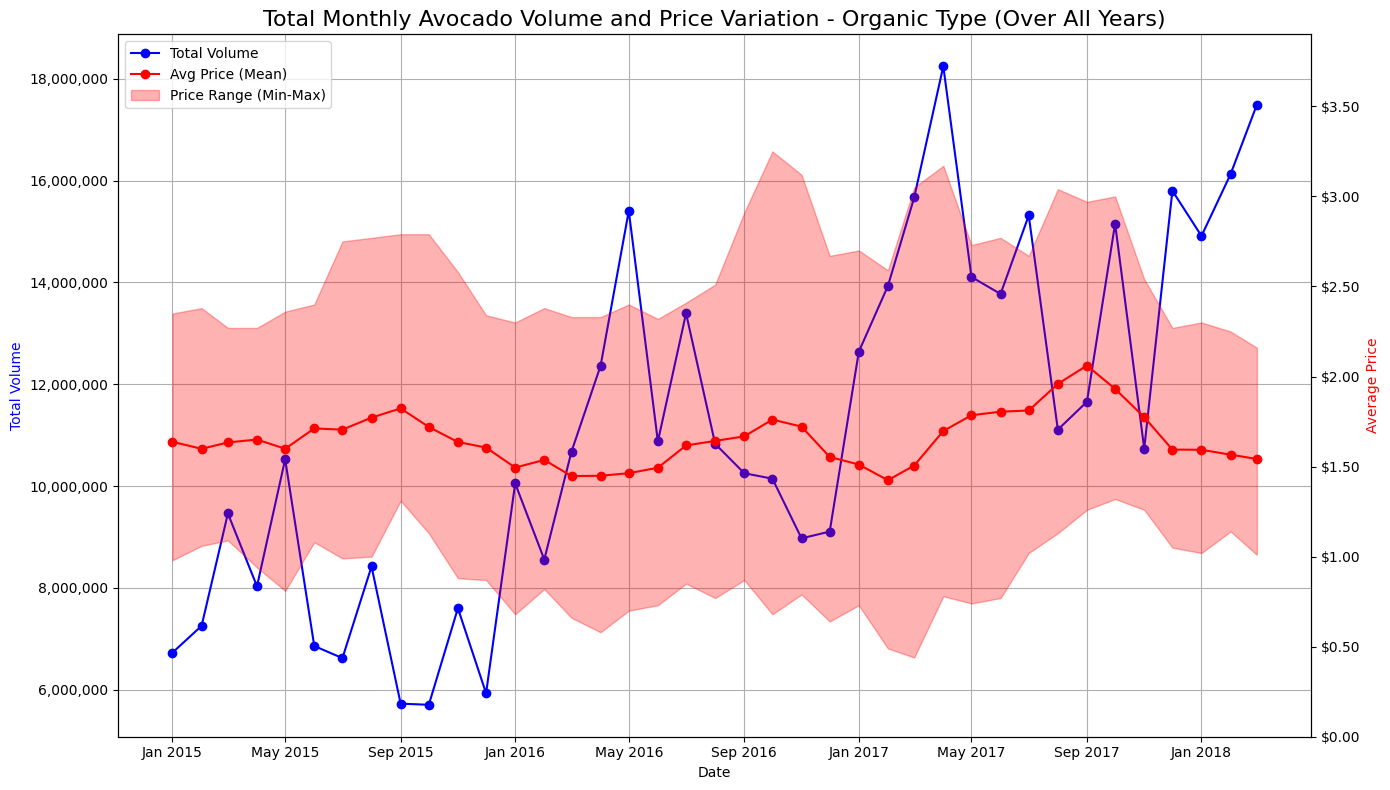

Time series charts with Total Volume and AveragePrice variations for each avocado type have been generated.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

types = df['type'].unique()

for avocado_type in types:
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    type_data = df[df['type'] == avocado_type]
    
    monthly_data = type_data.groupby(type_data['Date'].dt.to_period("M")).agg(
        {'Total Volume': 'sum', 'AveragePrice': ['mean', 'min', 'max', 'median']}
    ).reset_index()
    monthly_data.columns = ['Date', 'Total Volume', 'AveragePrice_Mean', 'AveragePrice_Min', 'AveragePrice_Max', 'AveragePrice_Median']
    monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
    
    ax1.plot(monthly_data['Date'], monthly_data['Total Volume'], marker='o', color='blue', label='Total Volume')
    
    ax1.set_title(f'Total Monthly Avocado Volume and Price Variation - {avocado_type.capitalize()} Type (Over All Years)', fontsize=16)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Volume', color='blue')
    ax1.grid(True)
    ax1.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax2 = ax1.twinx()
    
    ax2.plot(monthly_data['Date'], monthly_data['AveragePrice_Mean'], marker='o', color='red', label='Avg Price (Mean)')
    ax2.fill_between(monthly_data['Date'], monthly_data['AveragePrice_Min'], monthly_data['AveragePrice_Max'], color='red', alpha=0.3, label='Price Range (Min-Max)')
    
    ax2.set_ylabel('Average Price', color='red')
    ax2.set_ylim(0, max(monthly_data['AveragePrice_Max']) * 1.2)  # Adjust as necessary
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

print("Time series charts with Total Volume and AveragePrice variations for each avocado type have been generated.")

## Drop unknow states and get temperatures per state

In [ ]:
df_filtered = df[df['State'] != 'Unknown']

In [ ]:
df_filtered.shape

In [ ]:
# !pip install meteostat
from datetime import datetime
from meteostat import Point, Daily

In [ ]:
state_locations = {
    'California': Point(36.7783, -119.4179),  
    'New York': Point(40.7128, -74.0060),
    'Florida': Point(27.9947, -81.7603),
    'Texas': Point(31.9686, -99.9018),
    'Washington': Point(47.6062, -122.3321),
    'Illinois': Point(40.6331, -89.3985),
    'Ohio': Point(39.9612, -82.9988),
    'Pennsylvania': Point(40.2732, -76.8860),
    'Georgia': Point(33.7490, -84.3880),
    'Michigan': Point(44.3148, -85.6024),
    'Louisiana': Point(30.9843, -91.9623),
    'Tennessee': Point(35.5175, -86.5804),
    'Maryland': Point(39.0458, -76.6413),
    'Idaho': Point(44.0682, -114.7420),
    'Massachusetts': Point(42.4072, -71.3824),
    'Kentucky': Point(37.8393, -84.2700),
    'Indiana': Point(40.2672, -86.1349),
    'Nevada': Point(38.8026, -116.4194),
    'Connecticut': Point(41.6032, -73.0877),
    'Texas':  Point(32.7767, -96.7970)
}

In [ ]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily

def fetch_temperature(state, location, start_date, end_date):
    data = Daily(location, start_date, end_date).fetch()
    data.index = pd.to_datetime(data.index)  # Ensure index is in datetime format
    return data[['tavg', 'tmin', 'tmax']]


start = datetime(2015, 1, 4)
end = datetime(2018, 3, 25)

temperature_data = {}
for state, location in state_locations.items():
    temperature_data[state] = fetch_temperature(state, location, start, end)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

def get_state_temperature(state, date):
    if state in temperature_data:
        temp_data = temperature_data[state]
        temp_data = temp_data.loc[temp_data.index.date == date.date()]  # Match dates
        if not temp_data.empty:
            return temp_data[['tavg', 'tmin', 'tmax']].mean().mean()
    return None

df['Temperature'] = df.apply(lambda row: get_state_temperature(row['State'], row['Date']), axis=1)


## Albany

In [ ]:
df_al = df[df['region']=='Albany']

In [ ]:
df_al['Month'].value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format if it's not already
df_al['Date'] = pd.to_datetime(df_al['Date'])

years = sorted(df_al['Date'].dt.year.unique())
types = df_al['type'].unique()

for avocado_type in types:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    type_data = df_al[df_al['type'] == avocado_type]
    
    for year in years:
        year_data = type_data[type_data['Date'].dt.year == year]
        monthly_data = year_data.groupby('Month')['Total Volume'].sum().reset_index()
        ax.plot(monthly_data['Month'], monthly_data['Total Volume'], marker='o', label=f'{year}')
    
    ax.set_title(f'Total Monthly Avocado Volume by Year - {avocado_type.capitalize()} Type', fontsize=16)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Volume')
    ax.grid(True)
    ax.set_xticks(range(1, 13))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    

    plt.tight_layout()
    plt.show()

print("Separate charts for each avocado type have been generated.")


In [ ]:

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


df_al.loc[:, 'Date'] = pd.to_datetime(df_al['Date'])

types = df_al['type'].unique()


for avocado_type in types:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    type_data = df_al[df_al['type'] == avocado_type]
    
    monthly_data = type_data.groupby(type_data['Date'].dt.to_period("M"))['Total Volume'].sum().reset_index()
    monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
    
    ax.plot(monthly_data['Date'], monthly_data['Total Volume'], marker='o', label=avocado_type.capitalize())
    
    ax.set_title(f'Total Monthly Avocado Volume - {avocado_type.capitalize()} Type (Over All Years)', fontsize=16)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Volume')
    ax.grid(True)
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Corrected import and usage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.xticks(rotation=45)
    
    ax.legend(title="Type", loc='upper left')
    
    plt.tight_layout()
    
    plt.show()

print("Time series charts with month and year on the x-axis for each avocado type have been generated.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

df_al.loc[:, 'Date'] = pd.to_datetime(df_al['Date'])

types = df_al['type'].unique()

for avocado_type in types:
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    type_data = df_al[df_al['type'] == avocado_type]
    
    monthly_data = type_data.groupby(type_data['Date'].dt.to_period("M")).agg(
        {'Total Volume': 'sum', 'AveragePrice': ['mean', 'min', 'max', 'median']}
    ).reset_index()
    monthly_data.columns = ['Date', 'Total Volume', 'AveragePrice_Mean', 'AveragePrice_Min', 'AveragePrice_Max', 'AveragePrice_Median']
    monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
    
    ax1.plot(monthly_data['Date'], monthly_data['Total Volume'], marker='o', color='blue', label='Total Volume')
    
    ax1.set_title(f'Total Monthly Avocado Volume and Price Variation - {avocado_type.capitalize()} Type (Over All Years)', fontsize=16)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Volume', color='blue')
    ax1.grid(True)
    ax1.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    ax2 = ax1.twinx()
    
    ax2.plot(monthly_data['Date'], monthly_data['AveragePrice_Mean'], marker='o', color='red', label='Avg Price (Mean)')
    ax2.fill_between(monthly_data['Date'], monthly_data['AveragePrice_Min'], monthly_data['AveragePrice_Max'], color='red', alpha=0.3, label='Price Range (Min-Max)')
    
    ax2.set_ylabel('Average Price', color='red')
    ax2.set_ylim(0, max(monthly_data['AveragePrice_Max']) * 1.2)  # Adjust as necessary
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

print("Time series charts with Total Volume and AveragePrice variations for each avocado type have been generated.")
